In [42]:
## NMOS Current Mirror Analysis for second stage of error amplifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

In [43]:
param_master = pd.read_csv("current_mirror_nmos_char_master.csv")

## Assumptions
1. 1/8 CM NMOS ratio for current efficiency

In [44]:
kgm_n = np.abs(param_master['kgmn Y'])
kgds_n = np.abs(param_master['kgds_n Y'])
kcgd_n = np.abs(param_master['kcgd_n Y'])
kcgs_n = np.abs(param_master['kcgs_n Y'])
ids = np.abs(param_master['ids Y'])
I_in = np.abs(param_master['ids X'])

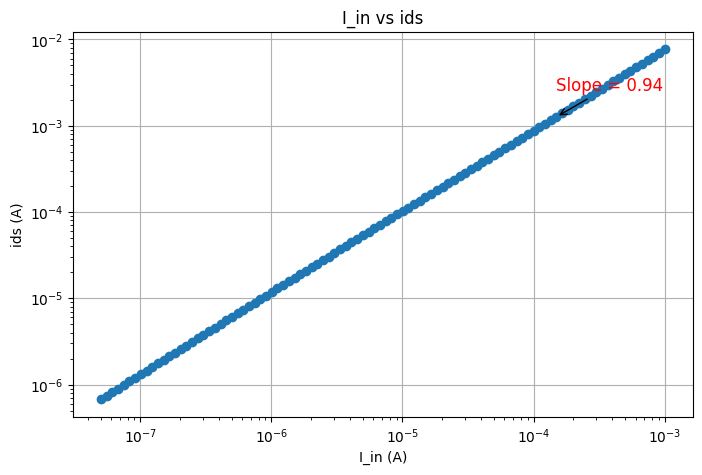

In [45]:

# Calculate the slope in log-log scale (d(ids)/d(I_in) in log space)
log_I_in = np.log10(I_in)
log_ids = np.log10(ids)
slope, intercept = np.polyfit(log_I_in, log_ids, 1)

# Annotate the slope on the plot
plt.figure(figsize=(8, 5))
plt.plot(I_in, ids, marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('I_in (A)')
plt.ylabel('ids (A)')
plt.title('I_in vs ids')
plt.grid(True)
plt.annotate(f'Slope = {slope:.2f}', xy=(I_in.iloc[-20], ids.iloc[-20]), 
             xytext=(I_in.iloc[-20], ids.iloc[-20]*2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='red')
plt.show()

In [46]:
## Find NMOS characteristics for I_target = 70uA
I_target = 70e-6
interp_ids = interp1d(ids, I_in, kind='linear', fill_value='extrapolate')
I_in_target = float(interp_ids(I_target))
print(f"I_in for I_target = {I_target*1e6:.2f} uA: {I_in_target*1e6:.2f} uA")

I_in for I_target = 70.00 uA: 6.65 uA


In [47]:
# Find the index in I_in closest to I_in_target
idx = (np.abs(I_in - I_in_target)).idxmin()

# Extract the corresponding values
cgs_at_target = kcgs_n.iloc[idx]*ids.iloc[idx]
cgd_at_target = kcgd_n.iloc[idx]*ids.iloc[idx]
gds_at_target = kgds_n.iloc[idx]*ids.iloc[idx]

print(f"At I_in = {I_in_target:.2e} A (for I_target = {I_target:.2e} A):")
print(f"  Cgs = {cgs_at_target:.3e} F")
print(f"  Cgd = {cgd_at_target:.3e} F")
print(f"  gds = {gds_at_target:.3e} S")

At I_in = 6.65e-06 A (for I_target = 7.00e-05 A):
  Cgs = 1.191e-14 F
  Cgd = 5.249e-15 F
  gds = 2.812e-05 S


In [48]:
## From common source amplifier analysis gds requirement for Gain

Av_target = 15
gm_target = 1.26e-3
gds_nmos_amp = 0.03e-3

gds_target = gm_target / Av_target

print(f"Required gds for Av = {Av_target}: {gds_target:.3e} S")

Required gds for Av = 15: 8.400e-05 S


In [49]:
## Extracting scaling factor for current mirror NMOS

gds_target_cm = gds_target - gds_nmos_amp
print(f"gds required from current mirror NMOS: {gds_target_cm:.3e} S")

scaling_factor_nmos = gds_target_cm/gds_at_target
print(f"Scaling factor for current mirror NMOS: {scaling_factor_nmos:.2f}")

gds required from current mirror NMOS: 5.400e-05 S
Scaling factor for current mirror NMOS: 1.92


In [50]:
## Estimating the parasitic capacitances at I_target = 70uA

cgd_scaled = cgd_at_target * scaling_factor_nmos
cgs_scaled = cgs_at_target * scaling_factor_nmos
print(f"Scaled Cgd: {cgd_scaled*1e15:.2f} fF, Scaled Cgs: {cgs_scaled*1e15:.2f} fF")

Scaled Cgd: 10.08 fF, Scaled Cgs: 22.87 fF
